In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import random
random.seed(42)
np.random.seed(42)

In [48]:
mirna = pd.read_csv('mirnaBoth.csv', delimiter = '\t', index_col=0)
mirna.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-941-5,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
TCGA-DS-A7WI-01A,13.102057,13.083305,13.104144,13.742860,10.438553,9.388288,10.874929,12.039819,12.066751,8.794529,...,0.0,3.778872,0.26165,7.692150,3.477843,0.0,5.112926,5.898700,8.430487,15.072155
TCGA-EX-A449-01A,12.985948,12.989705,12.981187,14.201631,7.939123,9.378911,9.611301,11.662156,11.624237,9.748356,...,0.0,3.308643,0.00000,0.000000,2.832785,0.0,5.611240,5.526646,6.323036,14.058793
TCGA-VS-A958-01A,13.105616,13.106662,13.116650,13.891939,11.257072,8.864434,9.691442,12.351052,12.378561,9.657591,...,0.0,5.345726,0.00000,7.015640,3.573284,0.0,1.784015,5.058913,10.009802,12.502825
TCGA-MY-A5BE-01A,13.273764,13.261483,13.261010,13.460205,11.880618,9.091778,8.231303,12.302426,12.317468,9.896008,...,0.0,4.384727,0.00000,5.901879,2.263774,0.0,4.190404,5.360087,9.985308,12.629801
TCGA-EK-A2R9-01A,13.112587,13.098747,13.120347,14.496179,12.205251,9.821445,9.783479,11.300281,11.325081,9.631657,...,0.0,3.875419,0.00000,5.712340,1.809051,0.0,6.128449,5.641736,10.655252,14.761135


In [49]:
mirnaLabel = pd.read_csv('mirnaBothLabel.csv', delimiter = '\t', index_col=0)
mirnaLabel

,label
TCGA-DS-A7WI-01A,1
TCGA-EX-A449-01A,1
TCGA-VS-A958-01A,1
TCGA-MY-A5BE-01A,1
TCGA-EK-A2R9-01A,1
...,...
TCGA-EY-A1GV-01A,0
TCGA-EO-A2CG-01A,0
TCGA-B5-A0K2-01A,0
TCGA-AJ-A2QN-01A,0


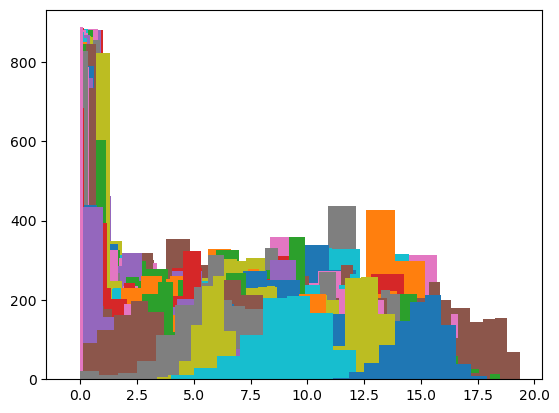

In [50]:
for i in range(1881):
    plt.hist(mirna.iloc[:, [i]])

In [51]:
# standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mirna = pd.DataFrame(scaler.fit_transform(mirna.values), columns=mirna.columns, index=mirna.index)
mirna

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-941-5,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
TCGA-DS-A7WI-01A,0.012702,-0.007520,0.003777,-0.068024,-0.194365,0.049867,1.043829,0.465464,0.471414,-1.003813,...,0.0,0.416518,0.724273,1.937596,0.827891,0.0,0.080583,0.057539,-0.421630,0.142053
TCGA-EX-A449-01A,-0.171142,-0.155648,-0.191487,0.454791,-1.853909,0.037130,-0.566991,0.048710,-0.015255,0.073225,...,0.0,-0.026455,-0.455029,-0.869284,0.315142,0.0,0.428993,-0.481999,-1.691606,-0.773565
TCGA-VS-A958-01A,0.018337,0.029442,0.023639,0.101867,0.349106,-0.661732,-0.464829,0.808913,0.814338,-0.029265,...,0.0,1.892551,-0.455029,1.690736,0.903756,0.0,-2.246913,-1.160286,0.530086,-2.179450
TCGA-MY-A5BE-01A,0.284578,0.274458,0.252893,-0.390137,0.763121,-0.352909,-2.326153,0.755254,0.747149,0.239950,...,0.0,0.987256,-0.455029,1.284323,-0.137157,0.0,-0.564422,-0.723536,0.515326,-2.064723
TCGA-EK-A2R9-01A,0.029375,0.016917,0.029510,0.790457,0.978668,0.638265,-0.347505,-0.350623,-0.344262,-0.058548,...,0.0,0.507469,-0.455029,1.215160,-0.498611,0.0,0.790613,-0.315099,0.919042,-0.138967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-EY-A1GV-01A,-1.218459,-1.239892,-1.215926,-0.817586,-3.029310,-0.684624,1.072083,-0.206695,-0.199779,0.153521,...,0.0,-1.197397,-0.455029,-0.869284,-0.630232,0.0,-0.532578,1.345017,-2.949311,1.135245
TCGA-EO-A2CG-01A,-0.239901,-0.245775,-0.242035,-0.628578,0.738747,-0.616077,0.639447,0.610029,0.590944,-0.786459,...,0.0,-1.403440,0.757836,-0.415684,-1.127319,0.0,-0.775716,0.345458,0.846791,0.536951
TCGA-B5-A0K2-01A,-0.769832,-0.713503,-0.750949,1.460392,0.793152,0.014201,-0.399323,-1.545179,-1.610609,0.241055,...,0.0,-0.918178,-0.455029,-0.278699,0.700762,0.0,-0.018512,-0.227057,0.315029,0.905360
TCGA-AJ-A2QN-01A,1.225901,1.238410,1.232324,0.414372,0.499108,-1.411577,0.908408,0.391839,0.370949,-0.298123,...,0.0,-0.557658,0.501150,-0.829156,-0.256818,0.0,-0.066508,0.852883,0.781801,-0.245549


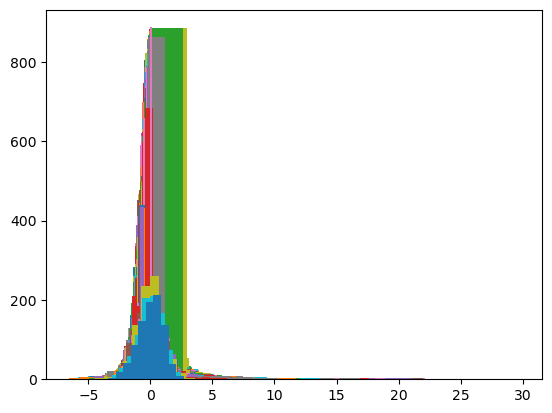

In [52]:
for i in range(1881):
    plt.hist(mirna.iloc[:, [i]])

In [53]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(mirna, mirnaLabel, test_size=0.2, stratify=mirnaLabel,  random_state=42)
# stratified!!!

In [54]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.005)
lasso_reg.fit(X_train, y_train)
lassoData = pd.DataFrame(lasso_reg.coef_)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lassoData)
    
criteria = lassoData[lassoData[0] > 0]
# print(criteria)
# criteria = criteria[0].nlargest(n=10)

mirna = mirna.iloc[:, criteria.index]

             0
0    -0.000000
1    -0.000000
2    -0.000000
3     0.000000
4     0.000000
5     0.000000
6    -0.000000
7     0.000000
8     0.000000
9    -0.000000
10    0.000000
11    0.000000
12    0.000000
13   -0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19   -0.000000
20    0.000000
21    0.000000
22    0.000000
23   -0.000000
24   -0.000000
25   -0.000000
26   -0.047913
27   -0.000000
28    0.000000
29   -0.000000
30   -0.000000
31   -0.000000
32    0.000000
33    0.000000
34   -0.000000
35    0.000000
36    0.000000
37    0.001936
38    0.000000
39    0.000000
40    0.000000
41   -0.004828
42    0.000000
43    0.000000
44   -0.000000
45   -0.000000
46   -0.000000
47    0.000000
48    0.000000
49    0.000000
50   -0.000000
51   -0.000000
52   -0.000000
53   -0.000000
54    0.000000
55   -0.000000
56    0.000000
57    0.000000
58    0.000000
59    0.000000
60   -0.004260
61   -0.000000
62   -0.000000
63    0.000000
64   -0.000000
65    0.00

In [55]:
numCol = mirna.shape[1]
numCol

131

In [56]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(mirna, mirnaLabel, test_size=0.2, stratify=mirnaLabel, random_state=42)
# stratified!!!

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import NearestCentroid

LR: 0.942416 (0.030631)


  0%|          | 0/178 [00:00<?, ?it/s]

Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.487e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 85 iterations, alpha=8.151e-03, previous alpha=7.922e-03, with an active set of 38 regressors.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 143 iterations, alpha=2.381e-04, previous alpha=2.381e-04, with an active set of 36 regressors.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.818e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer

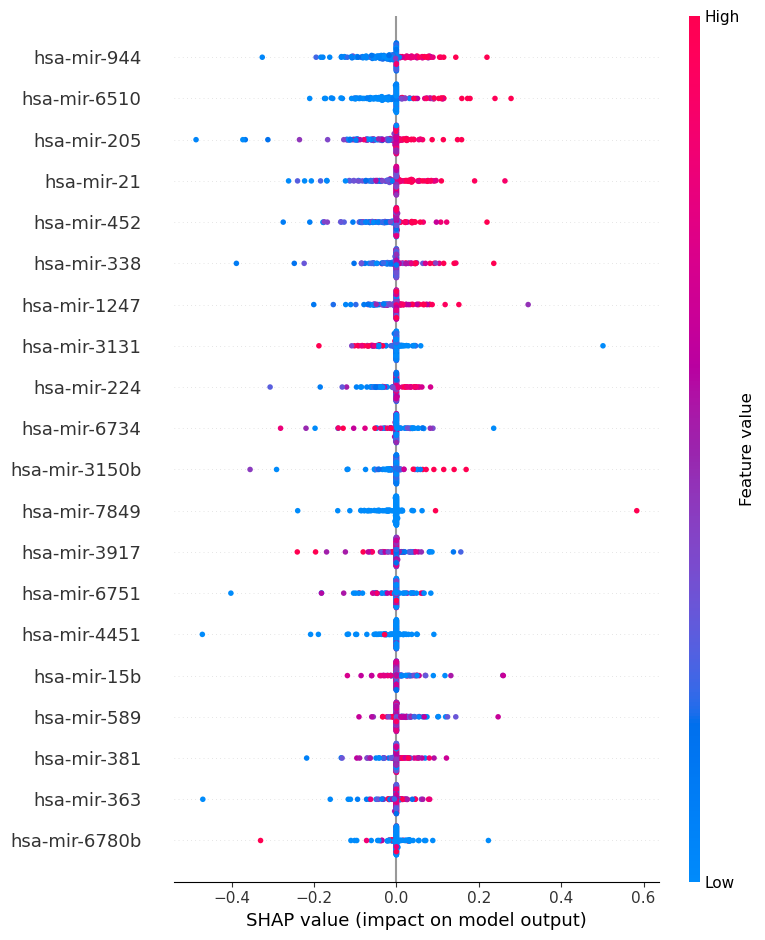

          col_name  feature_importance_vals
130    hsa-mir-944                 0.040881
107   hsa-mir-6510                 0.040222
20     hsa-mir-205                 0.037554
21      hsa-mir-21                 0.034126
59     hsa-mir-452                 0.027812
..             ...                      ...
88   hsa-mir-548bb                 0.000000
12    hsa-mir-1587                 0.000000
104   hsa-mir-6134                 0.000000
103    hsa-mir-601                 0.000000
69    hsa-mir-4765                 0.000000

[131 rows x 2 columns]
sum shap 1.0402083529762216
sum shap 1.0000000000000002
[0.03930107122545666, 0.03866761845158818, 0.03610225718645508, 0.03280670335137581, 0.026736510981872925, 0.02095129948158056, 0.020929701524318816, 0.015858172714478435, 0.015712970072367445, 0.015199041340361997, 0.014093647499664672, 0.013849000934495924, 0.013247667389014516, 0.013072931830468752, 0.012906755430686256, 0.012343452741288816, 0.01228163138024099, 0.01207909469159269, 0.

  0%|          | 0/178 [00:00<?, ?it/s]

Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=9.424e-03, with an active set of 8 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 86 iterations, alpha=7.991e-04, previous alpha=7.562e-04, with an active set of 33 regressors.
Regressors in active set degenerate. Dropping a regressor, after 11 iterations, i.e. alpha=2.557e-02, with an active set of 11 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 14 iterations, i.e. alpha=2.221e-02, with an active set of 14 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the curren

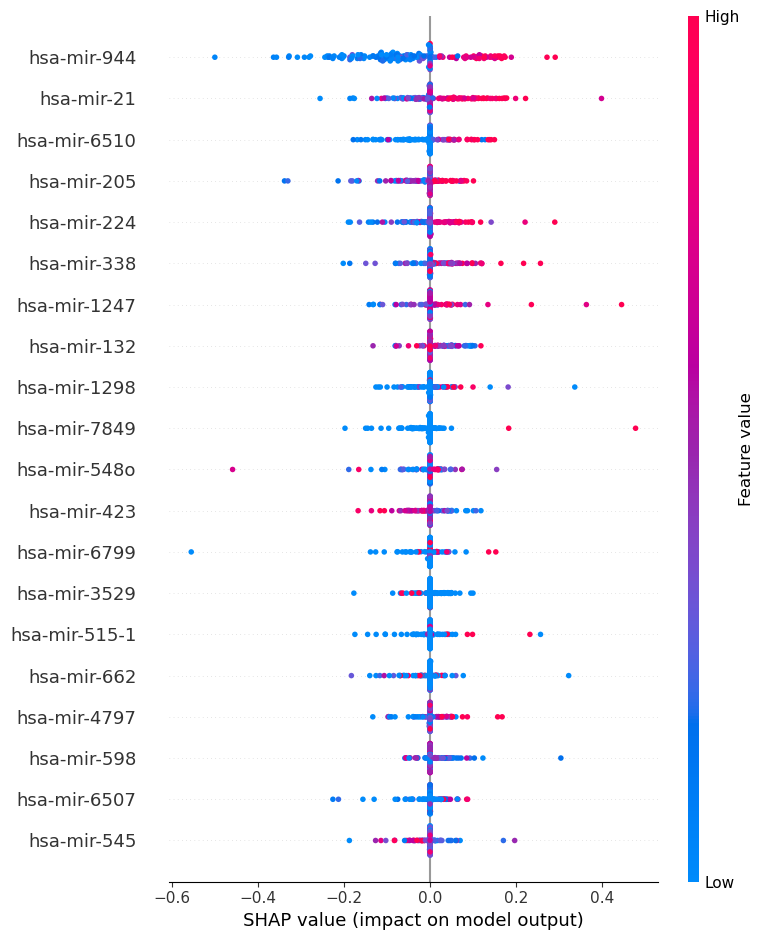

          col_name  feature_importance_vals
130    hsa-mir-944                 0.107188
21      hsa-mir-21                 0.048006
107   hsa-mir-6510                 0.031756
20     hsa-mir-205                 0.029734
23     hsa-mir-224                 0.029147
..             ...                      ...
56    hsa-mir-4499                 0.000000
103    hsa-mir-601                 0.000000
88   hsa-mir-548bb                 0.000000
104   hsa-mir-6134                 0.000000
62   hsa-mir-4659b                 0.000000

[131 rows x 2 columns]
sum shap 1.1895461751724272
sum shap 1.0000000000000004
[0.0901082936628163, 0.040356375419979905, 0.026695573151995902, 0.024996191074412453, 0.024502894999671256, 0.020458908948275997, 0.016576508801469672, 0.01488682586591459, 0.013326468279254447, 0.012886873611936784, 0.01260440177684123, 0.012308632367079925, 0.011090468622467192, 0.011072986127977679, 0.010976068545098293, 0.010970976033565068, 0.010576073168382329, 0.010444977569521358,

  0%|          | 0/178 [00:00<?, ?it/s]

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 59 iterations, alpha=2.437e-04, previous alpha=2.098e-04, with an active set of 32 regressors.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


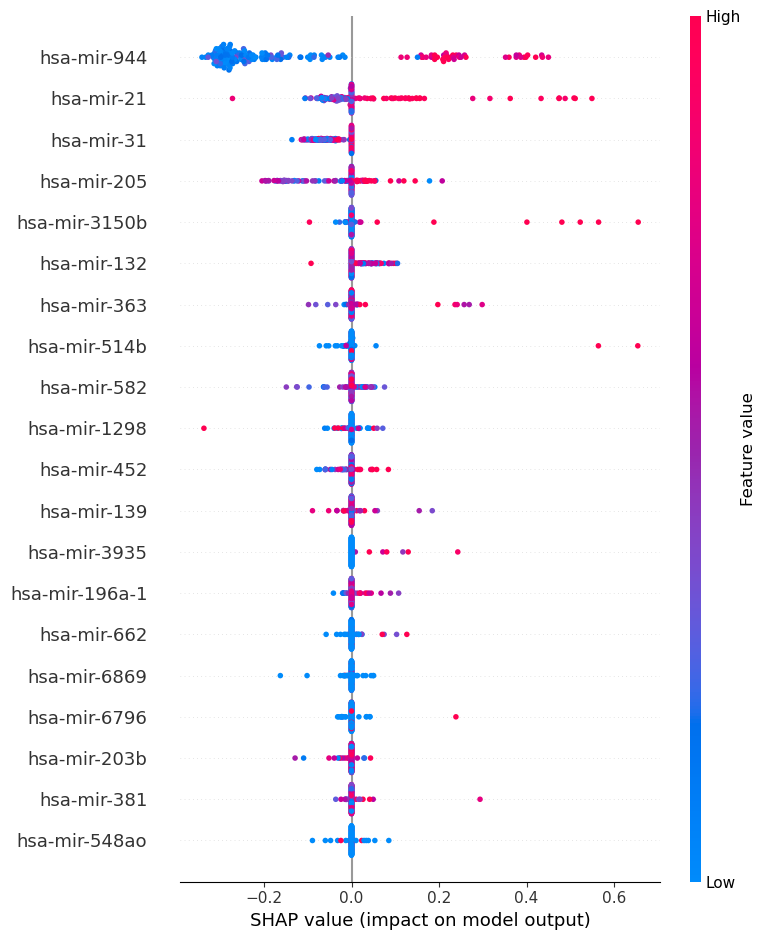

          col_name  feature_importance_vals
130    hsa-mir-944                 0.240713
21      hsa-mir-21                 0.058883
26      hsa-mir-31                 0.046386
20     hsa-mir-205                 0.043836
30   hsa-mir-3150b                 0.017736
..             ...                      ...
101    hsa-mir-591                 0.000000
103    hsa-mir-601                 0.000000
104   hsa-mir-6134                 0.000000
35    hsa-mir-3195                 0.000000
65    hsa-mir-4720                 0.000000

[131 rows x 2 columns]
sum shap 0.6376716230539763
sum shap 1.0000000000000007
[0.3774876784286276, 0.09234015193410039, 0.07274286038554492, 0.06874356400454482, 0.02781322133512229, 0.02449190505745833, 0.017247929425333857, 0.014774249948637679, 0.013922523860676616, 0.009935349968439986, 0.009886587378003329, 0.007347748951433604, 0.006089551789865901, 0.0057381222170222535, 0.005650104244064829, 0.00563493126088739, 0.0055430447732109185, 0.005126394658549934, 0

[02:41:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


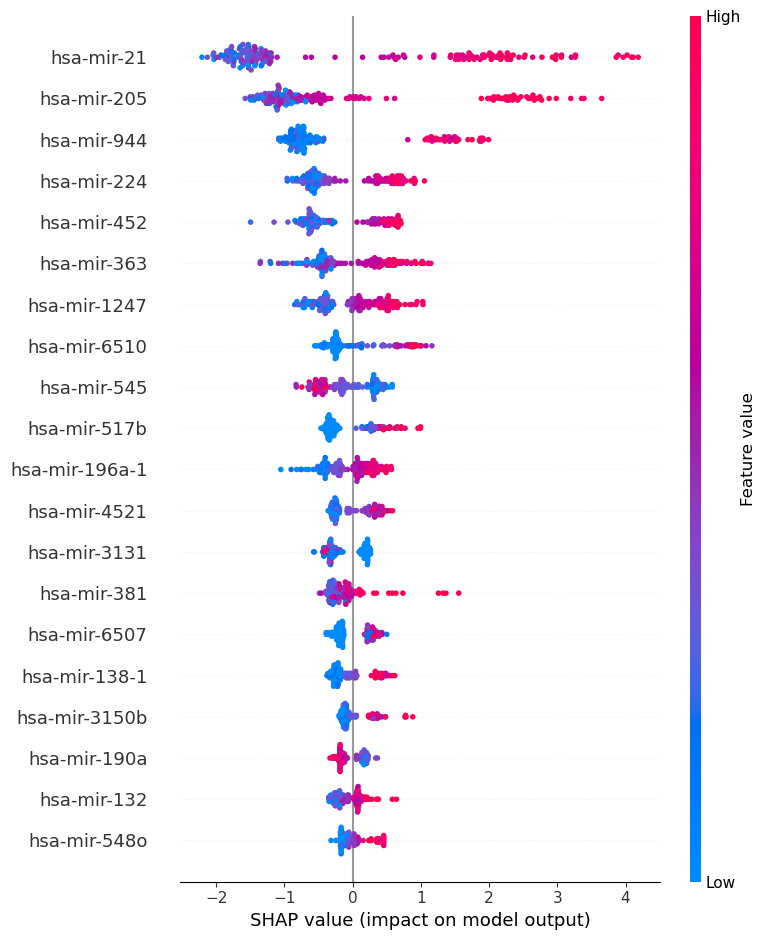

         col_name  feature_importance_vals
21     hsa-mir-21                 1.764367
20    hsa-mir-205                 1.257551
130   hsa-mir-944                 0.942001
23    hsa-mir-224                 0.561801
59    hsa-mir-452                 0.551455
..            ...                      ...
40   hsa-mir-3646                 0.000000
78    hsa-mir-510                 0.000000
77   hsa-mir-5089                 0.000000
76   hsa-mir-5011                 0.000000
65   hsa-mir-4720                 0.000000

[131 rows x 2 columns]
sum shap 11.456105324905366
sum shap 1.0000000000000002
[0.1540110756262827, 0.10977125631815918, 0.08222700965579453, 0.04903948394630511, 0.048136307063551105, 0.04399788577980388, 0.03478625108041922, 0.0319970202439085, 0.03087796061081973, 0.0307591478354927, 0.02541782004176133, 0.024403676314018054, 0.02286686511485178, 0.021193010278353484, 0.020951887097281935, 0.020635445846547223, 0.01518185829423976, 0.014852305807131597, 0.014833314025158507, 

  0%|          | 0/178 [00:00<?, ?it/s]

Regressors in active set degenerate. Dropping a regressor, after 11 iterations, i.e. alpha=2.591e-02, with an active set of 11 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 57 iterations, alpha=3.849e-03, previous alpha=3.808e-03, with an active set of 30 regressors.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 39 iterations, alpha=1.385e-04, previous alpha=1.371e-04, with an active set of 26 regressors.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 37 iterations, alpha=1.678e-03, previous alpha=1.654e-03, with an active set of 22 regressors.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


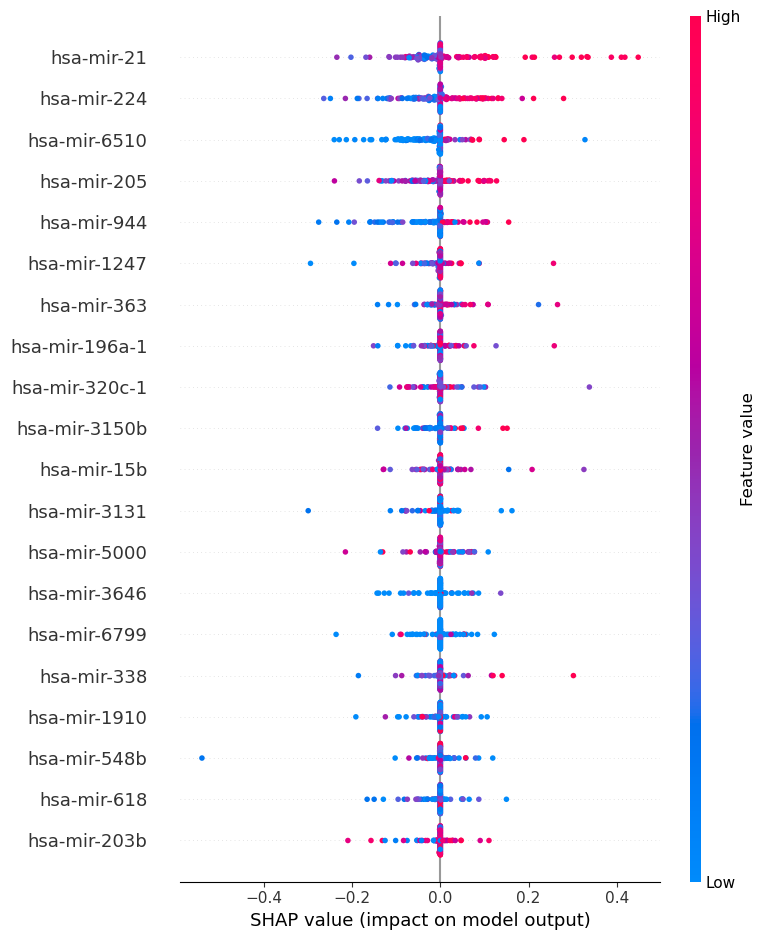

           col_name  feature_importance_vals
21       hsa-mir-21                 0.058047
23      hsa-mir-224                 0.044552
107    hsa-mir-6510                 0.036446
20      hsa-mir-205                 0.029553
130     hsa-mir-944                 0.027702
..              ...                      ...
33   hsa-mir-3156-2                 0.000000
104    hsa-mir-6134                 0.000000
103     hsa-mir-601                 0.000000
34     hsa-mir-3185                 0.000000
99      hsa-mir-586                 0.000000

[131 rows x 2 columns]
sum shap 0.9370488547782927
sum shap 1.0
[0.06194653850428949, 0.04754509055128639, 0.038894166894604884, 0.03153876333390024, 0.02956268544176765, 0.013636686019901836, 0.012831430867811314, 0.012637354336467973, 0.012526098753722265, 0.012452963981684266, 0.01236032452248005, 0.011756702716093463, 0.011623019063675624, 0.0115393564142863, 0.011526151416648969, 0.011494170408959928, 0.0111763650128114, 0.010897378063129261, 0.01060

  0%|          | 0/178 [00:00<?, ?it/s]

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 159 iterations, alpha=1.414e-04, previous alpha=1.414e-04, with an active set of 42 regressors.
Linear regression equation is singular, Moore-Penrose pseudoinverse is used instead of the regular inverse.
To use regular inverse do one of the following:
1) turn up the number of samples,
2) turn up the L1 regularization with num_features(N) where N is less than the number of samples,
3) group features together to reduce the number of inputs that need to be explained.
Regressors in active set degenerate. Dropping a regressor, after 20 iterations, i.e. alpha=3.067e-03, with an active set of 16 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 97 iterations, alpha=3.269e-05, previous alpha=3.269e-05,

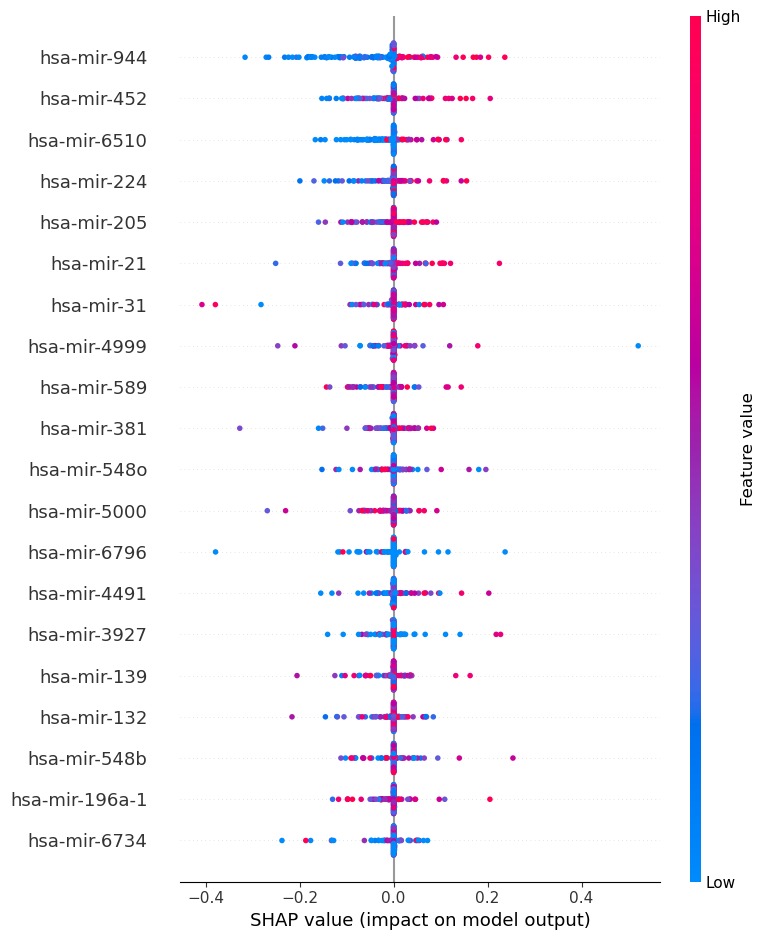

           col_name  feature_importance_vals
130     hsa-mir-944                 0.055787
59      hsa-mir-452                 0.025196
107    hsa-mir-6510                 0.024093
23      hsa-mir-224                 0.017788
20      hsa-mir-205                 0.016852
..              ...                      ...
93    hsa-mir-5681a                 0.000000
98      hsa-mir-583                 0.000000
3      hsa-mir-1263                 0.000000
5      hsa-mir-1297                 0.000000
82   hsa-mir-526a-1                 0.000000

[131 rows x 2 columns]
sum shap 0.9553685540084483
sum shap 0.9999999999999998
[0.05839366272096953, 0.02637358964679586, 0.02521903643600826, 0.01861946318120415, 0.017638798472245677, 0.016705063044449957, 0.016023771533638865, 0.013988095197855025, 0.013574484880762521, 0.013427556947825691, 0.012545481086035346, 0.012530343401748191, 0.012508111653087156, 0.0122929135707112, 0.011952982462165616, 0.011937629247350185, 0.011844817357736103, 0.011782373

  0%|          | 0/178 [00:00<?, ?it/s]

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 138 iterations, alpha=2.203e-04, previous alpha=2.203e-04, with an active set of 39 regressors.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=5.219e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 93 iterations, alpha=7.462e-03, previous alpha=7.462e-03, with an active set of 32 regressors.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 87 iterations, alpha=3.871e-04, previous alpha=3.839e-04, with an active set of 34 regressors.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=5.986e-02, with an active set of 5 

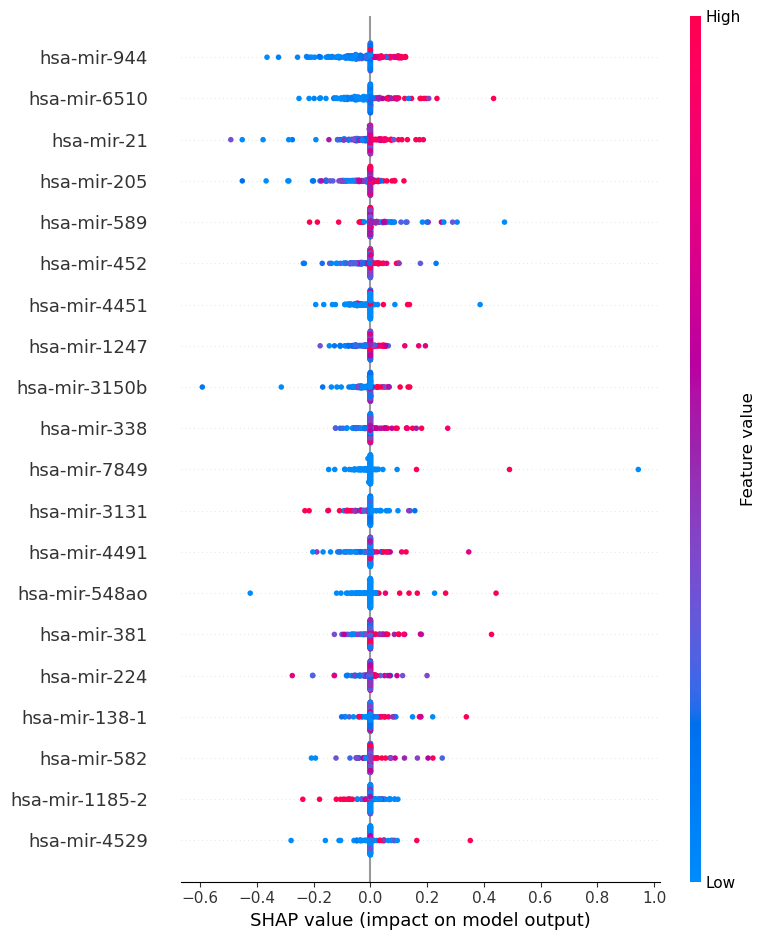

          col_name  feature_importance_vals
130    hsa-mir-944                 0.057863
107   hsa-mir-6510                 0.049080
21      hsa-mir-21                 0.039163
20     hsa-mir-205                 0.036037
100    hsa-mir-589                 0.025721
..             ...                      ...
12    hsa-mir-1587                 0.000000
69    hsa-mir-4765                 0.000000
49    hsa-mir-4278                 0.000000
54    hsa-mir-4485                 0.000000
93   hsa-mir-5681a                 0.000000

[131 rows x 2 columns]
sum shap 1.2287348657493393
sum shap 1.0000000000000002
[0.0470917975827335, 0.03994331140864413, 0.0318724125949973, 0.02932835315932239, 0.020932871129420237, 0.020715326414985812, 0.01883252583524039, 0.01795242427119608, 0.01712375895940164, 0.016287468730449724, 0.015165689162953914, 0.014951845655141531, 0.0147416001839737, 0.014440646259588677, 0.013675972199209255, 0.013364885263244562, 0.012185889397544992, 0.011833322058937331, 0.0118

  0%|          | 0/178 [00:00<?, ?it/s]

Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.210e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 84 iterations, alpha=8.035e-03, previous alpha=8.035e-03, with an active set of 45 regressors.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 36 iterations, alpha=1.489e-03, previous alpha=1.447e-03, with an active set of 25 regressors.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 70 iterations, alpha=2.690e-05, previous alpha=2.685e-05, with an active set of 33 regressors.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 60 iterat

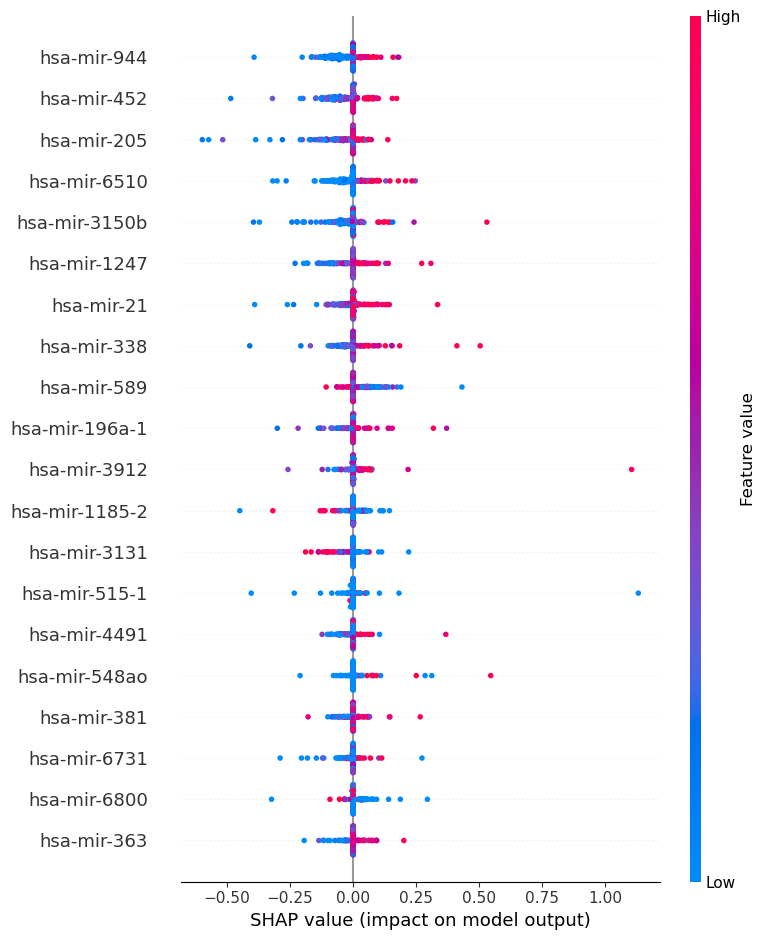

          col_name  feature_importance_vals
130    hsa-mir-944                 0.048760
59     hsa-mir-452                 0.047960
20     hsa-mir-205                 0.045770
107   hsa-mir-6510                 0.042980
30   hsa-mir-3150b                 0.041168
..             ...                      ...
88   hsa-mir-548bb                 0.000000
90     hsa-mir-558                 0.000000
98     hsa-mir-583                 0.000000
3     hsa-mir-1263                 0.000000
12    hsa-mir-1587                 0.000000

[131 rows x 2 columns]
sum shap 1.2615700635463722
sum shap 1.0000000000000002
[0.03865034917379509, 0.03801643171074869, 0.03627995620324259, 0.03406828109743826, 0.03263251346855938, 0.025767862468909206, 0.024107175538568948, 0.022785173470636227, 0.020227163285953233, 0.016119581120561915, 0.01562783584837259, 0.014952670148589359, 0.013933715612433069, 0.012781595243452386, 0.012359542486264249, 0.01223810408386614, 0.012166529182034447, 0.012104329688819445, 0.

  0%|          | 0/178 [00:00<?, ?it/s]

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 42 iterations, alpha=2.543e-03, previous alpha=2.537e-03, with an active set of 29 regressors.
Regressors in active set degenerate. Dropping a regressor, after 53 iterations, i.e. alpha=1.275e-03, with an active set of 29 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 131 iterations, alpha=3.204e-04, previous alpha=3.204e-04, with an active set of 46 regressors.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 105 iterations, alpha=6.144e-05, previous alpha=4.692e-05, with an active set of 44 regressors.
Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.854e-02, with an active set of

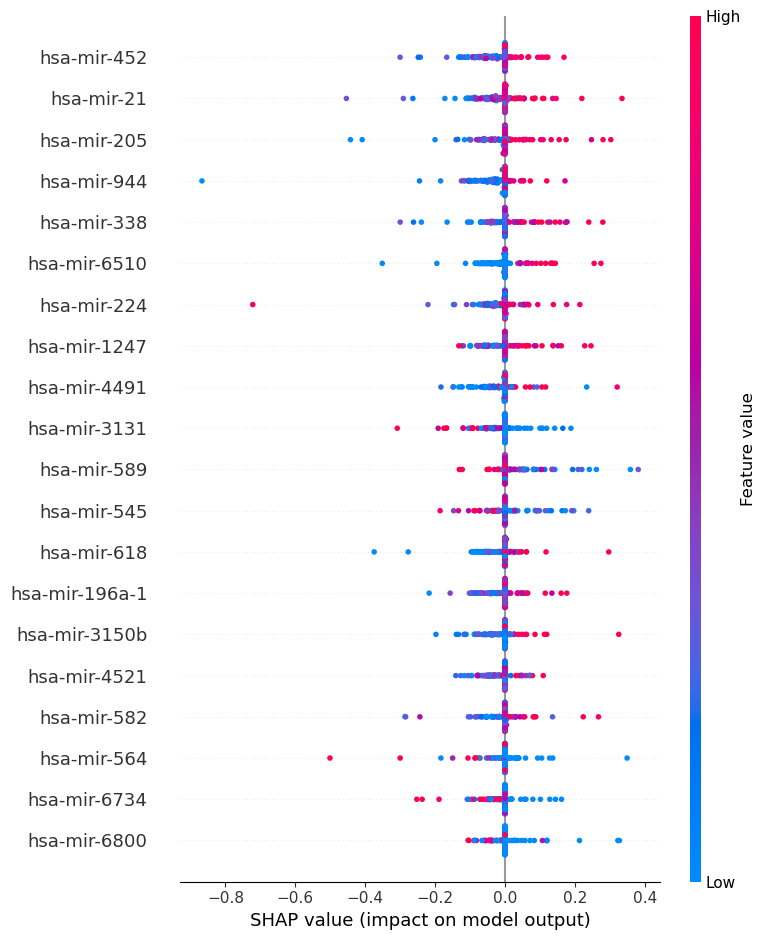

           col_name  feature_importance_vals
59      hsa-mir-452                 0.036569
21       hsa-mir-21                 0.035298
20      hsa-mir-205                 0.030555
130     hsa-mir-944                 0.029660
37      hsa-mir-338                 0.028575
..              ...                      ...
112    hsa-mir-6759                 0.000000
98      hsa-mir-583                 0.000000
104    hsa-mir-6134                 0.000000
33   hsa-mir-3156-2                 0.000000
88    hsa-mir-548bb                 0.000000

[131 rows x 2 columns]
sum shap 1.3416478367334934
sum shap 1.0000000000000002
[0.027256672041002003, 0.02630940251770783, 0.022774443030166874, 0.02210695518746596, 0.02129840967666023, 0.019617095950603975, 0.019113121746505184, 0.018827823930011655, 0.018794047368716857, 0.01866184033864346, 0.018016025977662296, 0.016373865969177302, 0.01529918652855723, 0.015271368715875583, 0.015043640656415481, 0.014060841777929633, 0.014008658221890033, 0.01285255

  0%|          | 0/178 [00:00<?, ?it/s]

Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.928e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 67 iterations, alpha=5.056e-03, previous alpha=4.994e-03, with an active set of 24 regressors.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 44 iterations, alpha=7.491e-04, previous alpha=7.361e-04, with an active set of 27 regressors.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 36 iterations, alpha=6.291e-04, previous alpha=6.279e-04, with an active set of 21 regressors.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 27 iterat

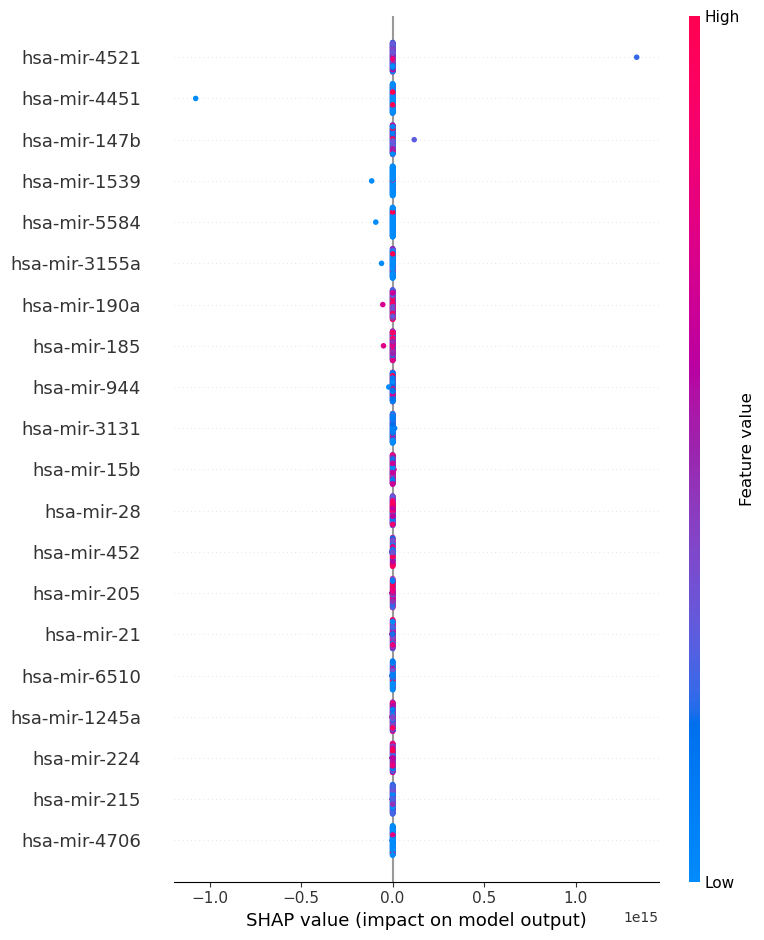

         col_name  feature_importance_vals
60   hsa-mir-4521             7.496022e+12
53   hsa-mir-4451             6.051439e+12
10   hsa-mir-147b             6.618821e+11
11   hsa-mir-1539             6.450397e+11
91   hsa-mir-5584             5.192158e+11
..            ...                      ...
12   hsa-mir-1587             0.000000e+00
103   hsa-mir-601             0.000000e+00
104  hsa-mir-6134             0.000000e+00
5    hsa-mir-1297             0.000000e+00
90    hsa-mir-558             0.000000e+00

[131 rows x 2 columns]
sum shap 16525343237273.44
sum shap 1.0000000000000007
[0.45360761508336184, 0.3661914260622021, 0.0400525494786988, 0.03903336343588775, 0.03141936806963554, 0.02071246303599088, 0.018366476689307486, 0.017034987675868588, 0.007241915031086166, 0.0036755676535351854, 0.0024641536775016877, 0.00020011410687813052, 2.6568776677741563e-15, 2.4997514224415973e-15, 1.7964703281176743e-15, 1.567984101772558e-15, 1.2328854799848791e-15, 7.631265772211384e-16, 7.

  0%|          | 0/178 [00:00<?, ?it/s]

Regressors in active set degenerate. Dropping a regressor, after 54 iterations, i.e. alpha=2.651e-05, with an active set of 38 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 55 iterations, alpha=2.651e-05, previous alpha=2.616e-05, with an active set of 38 regressors.
Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.016e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.547e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 10 iter

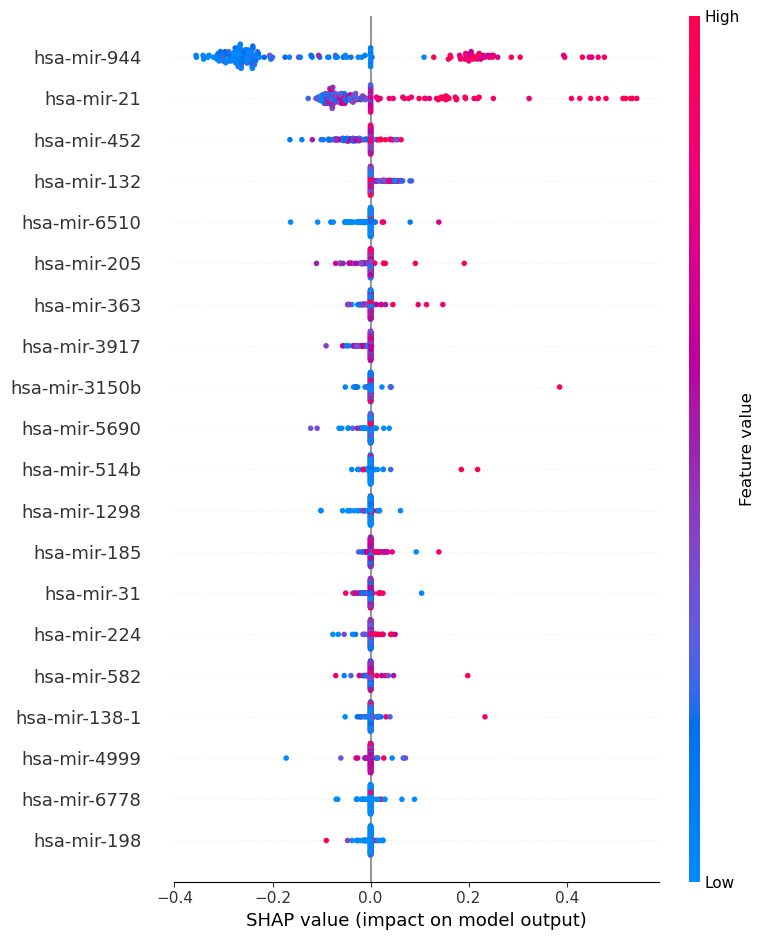

         col_name  feature_importance_vals
130   hsa-mir-944                 0.226602
21     hsa-mir-21                 0.095297
59    hsa-mir-452                 0.028648
7     hsa-mir-132                 0.014430
107  hsa-mir-6510                 0.009118
..            ...                      ...
98    hsa-mir-583                 0.000000
99    hsa-mir-586                 0.000000
101   hsa-mir-591                 0.000000
103   hsa-mir-601                 0.000000
65   hsa-mir-4720                 0.000000

[131 rows x 2 columns]
sum shap 0.5937136926741671
sum shap 1.0
[0.3816679813791918, 0.16050965048252716, 0.04825178186484321, 0.024304164597201063, 0.01535789624782031, 0.012174281786091779, 0.008769615143137125, 0.007936793938921365, 0.0073041766555932, 0.007113249863562462, 0.0067970973457154825, 0.006526599368119562, 0.006278650098840858, 0.006165249117960209, 0.0060983396438492685, 0.005784812809594427, 0.0057021552235530844, 0.005689476373655512, 0.005424634842753395, 0.00

  0%|          | 0/178 [00:00<?, ?it/s]

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 25 iterations, alpha=2.282e-03, previous alpha=2.225e-03, with an active set of 18 regressors.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 82 iterations, alpha=4.287e-05, previous alpha=2.651e-05, with an active set of 43 regressors.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.166e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 84 iterations, alpha=1.177e-02, previous alpha=1.129e-02, with an active set of 35 regressors.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 28 iterat

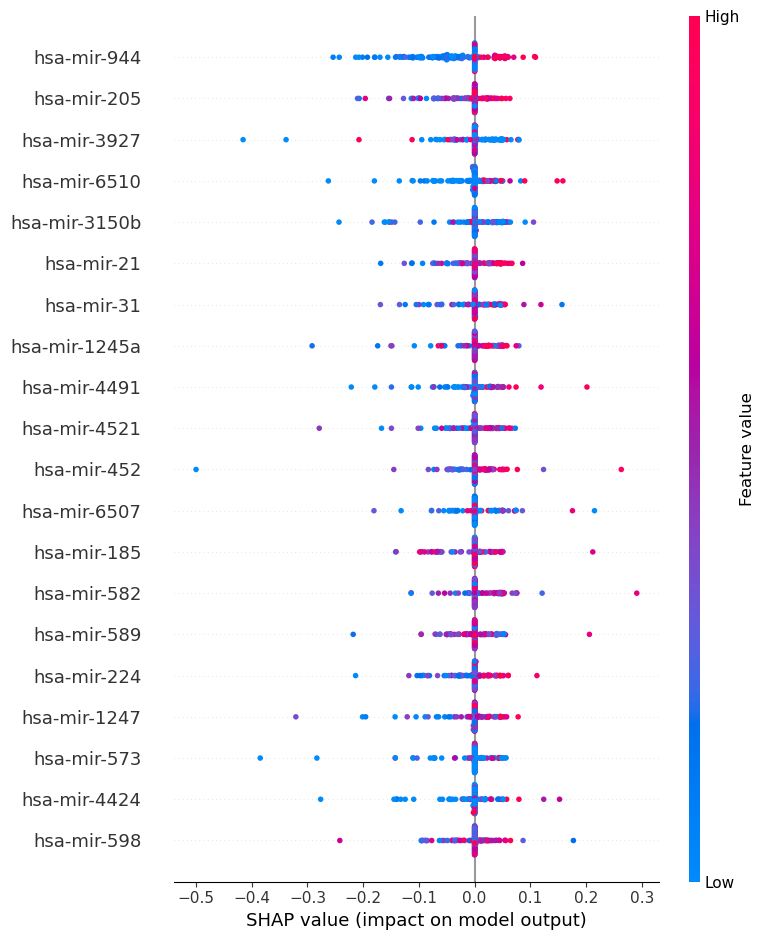

           col_name  feature_importance_vals
130     hsa-mir-944                 0.049514
20      hsa-mir-205                 0.021694
46     hsa-mir-3927                 0.019634
107    hsa-mir-6510                 0.019531
30    hsa-mir-3150b                 0.018448
..              ...                      ...
82   hsa-mir-526a-1                 0.000000
12     hsa-mir-1587                 0.000000
35     hsa-mir-3195                 0.000000
88    hsa-mir-548bb                 0.000000
33   hsa-mir-3156-2                 0.000000

[131 rows x 2 columns]
sum shap 1.1469147599128062
sum shap 0.9999999999999992
[0.043171465814994876, 0.01891530240701924, 0.017118718792040077, 0.0170292723255832, 0.016084470791904594, 0.01499442106598569, 0.01458199594757844, 0.014276050977595723, 0.014208149162072256, 0.013856069794386363, 0.013235318696523043, 0.013116776647483896, 0.012987873156659755, 0.012848758108461313, 0.012780693518091881, 0.012778990901221386, 0.012743650843134063, 0.01271812

  0%|          | 0/178 [00:00<?, ?it/s]

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 48 iterations, alpha=1.407e-04, previous alpha=1.375e-04, with an active set of 25 regressors.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 35 iterations, alpha=8.268e-04, previous alpha=8.109e-04, with an active set of 24 regressors.
Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.477e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 49 iterations, i.e. alpha=9.102e-03, with an active set of 19 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longe

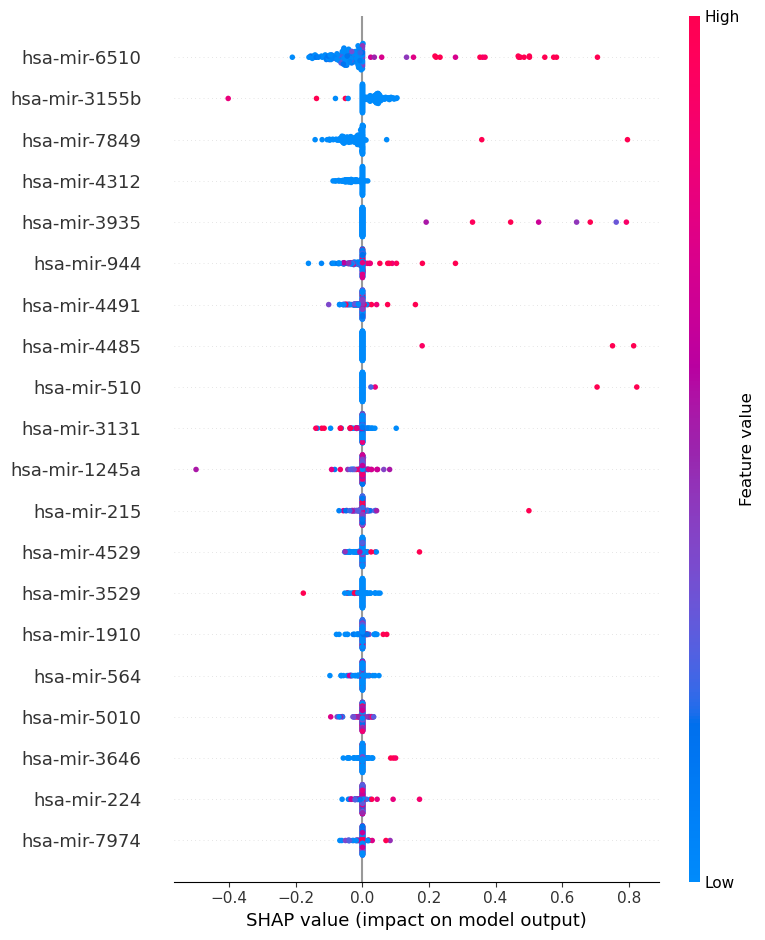

           col_name  feature_importance_vals
107    hsa-mir-6510                 0.085962
32    hsa-mir-3155b                 0.034599
126    hsa-mir-7849                 0.031505
50     hsa-mir-4312                 0.024680
47     hsa-mir-3935                 0.024600
..              ...                      ...
103     hsa-mir-601                 0.000000
4    hsa-mir-1289-2                 0.000000
69     hsa-mir-4765                 0.000000
5      hsa-mir-1297                 0.000000
104    hsa-mir-6134                 0.000000

[131 rows x 2 columns]
sum shap 0.6198403640816523
sum shap 1.0
[0.13868351736095438, 0.05581864314647101, 0.050827284491356976, 0.03981668647333029, 0.03968825886058538, 0.028985880947868217, 0.016201761748013112, 0.01581783362998194, 0.014430871005845277, 0.013545373893022995, 0.012391387640248247, 0.011871107962222946, 0.01128808704968249, 0.008951519183162782, 0.008876849699862773, 0.008727396478876614, 0.008507238437015851, 0.008144003631824841, 0.00

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names


  0%|          | 0/178 [00:00<?, ?it/s]

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
Early stopping t

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

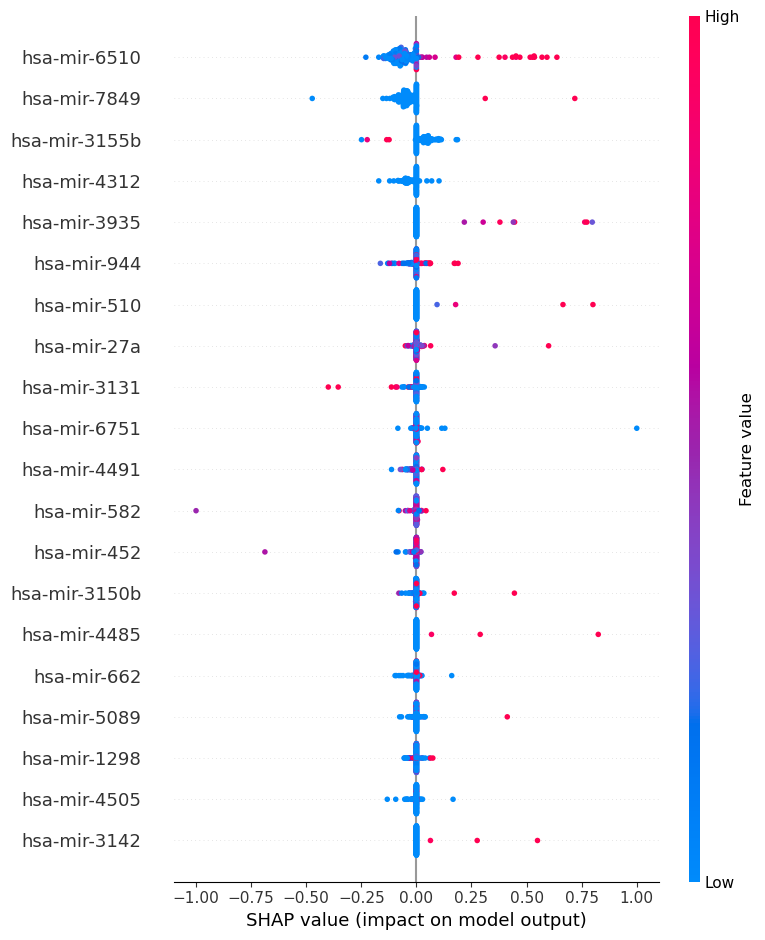

          col_name  feature_importance_vals
107   hsa-mir-6510                 0.100019
126   hsa-mir-7849                 0.043718
32   hsa-mir-3155b                 0.035641
50    hsa-mir-4312                 0.027006
47    hsa-mir-3935                 0.023146
..             ...                      ...
88   hsa-mir-548bb                 0.000000
49    hsa-mir-4278                 0.000000
12    hsa-mir-1587                 0.000000
98     hsa-mir-583                 0.000000
69    hsa-mir-4765                 0.000000

[131 rows x 2 columns]
sum shap 0.6516556002694905
sum shap 0.9999999999999993
[0.15348485162622597, 0.06708709975318373, 0.05469303064447609, 0.04144193250684169, 0.03551904563335551, 0.028889485678302525, 0.014981765491571274, 0.014778351081774006, 0.014403970125463083, 0.014093200109491727, 0.013774814301164567, 0.013585274123828593, 0.010655122939967244, 0.010588738152980228, 0.010201289803735794, 0.00884633250032899, 0.008790316312715615, 0.008498430934359372, 0

  0%|          | 0/178 [00:00<?, ?it/s]

Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.383e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 22 iterations, alpha=1.472e-02, previous alpha=1.449e-02, with an active set of 11 regressors.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 78 iterations, alpha=3.612e-05, previous alpha=3.612e-05, with an active set of 41 regressors.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.318e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer 

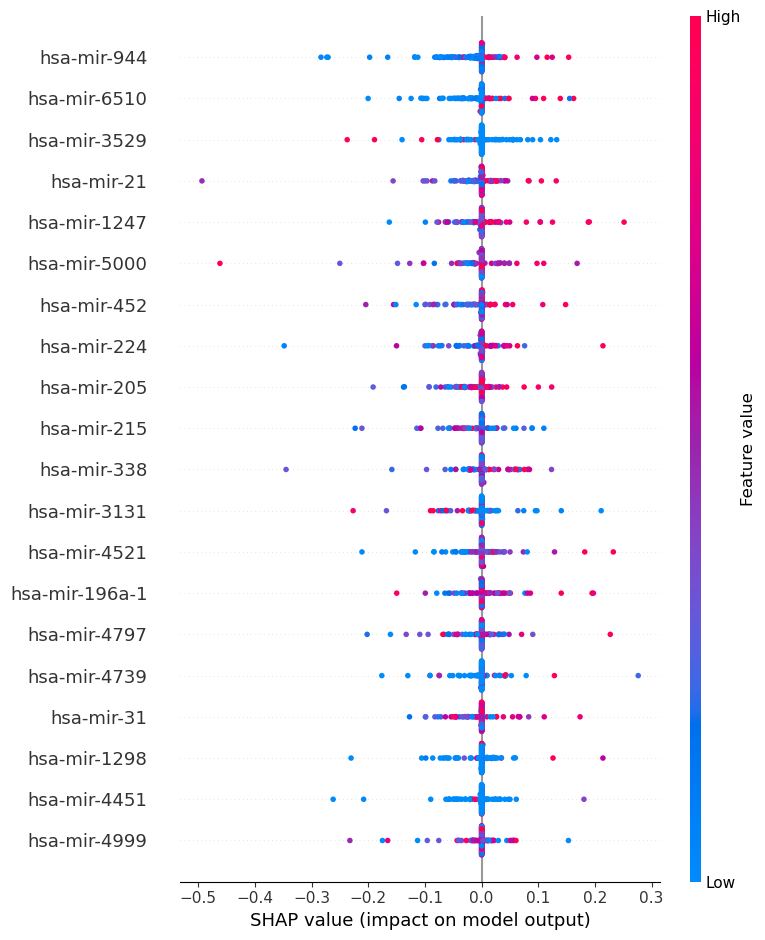

          col_name  feature_importance_vals
130    hsa-mir-944                 0.024932
107   hsa-mir-6510                 0.017641
38    hsa-mir-3529                 0.015126
21      hsa-mir-21                 0.014968
2     hsa-mir-1247                 0.014929
..             ...                      ...
69    hsa-mir-4765                 0.000000
103    hsa-mir-601                 0.000000
3     hsa-mir-1263                 0.000000
49    hsa-mir-4278                 0.000000
88   hsa-mir-548bb                 0.000000

[131 rows x 2 columns]
sum shap 0.9093221775013085
sum shap 0.9999999999999998
[0.027418575388309115, 0.01940025157168252, 0.016634628616562286, 0.01646079694496773, 0.016418072650592832, 0.016358544058453585, 0.015904809477207377, 0.015401015016649212, 0.014910397593751424, 0.014479095174899873, 0.01422347161652061, 0.014003944449424372, 0.013991161643889838, 0.01356924748440243, 0.013189262097663383, 0.01225270780727629, 0.012173739359737111, 0.012025362111995284, 

  0%|          | 0/178 [00:00<?, ?it/s]

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 49 iterations, alpha=5.515e-04, previous alpha=5.409e-04, with an active set of 28 regressors.
Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.723e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 41 iterations, alpha=8.964e-03, previous alpha=8.883e-03, with an active set of 22 regressors.
Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=3.579e-02, with an active set of 8 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 13 iterations, i.e. alpha=1.789e-02

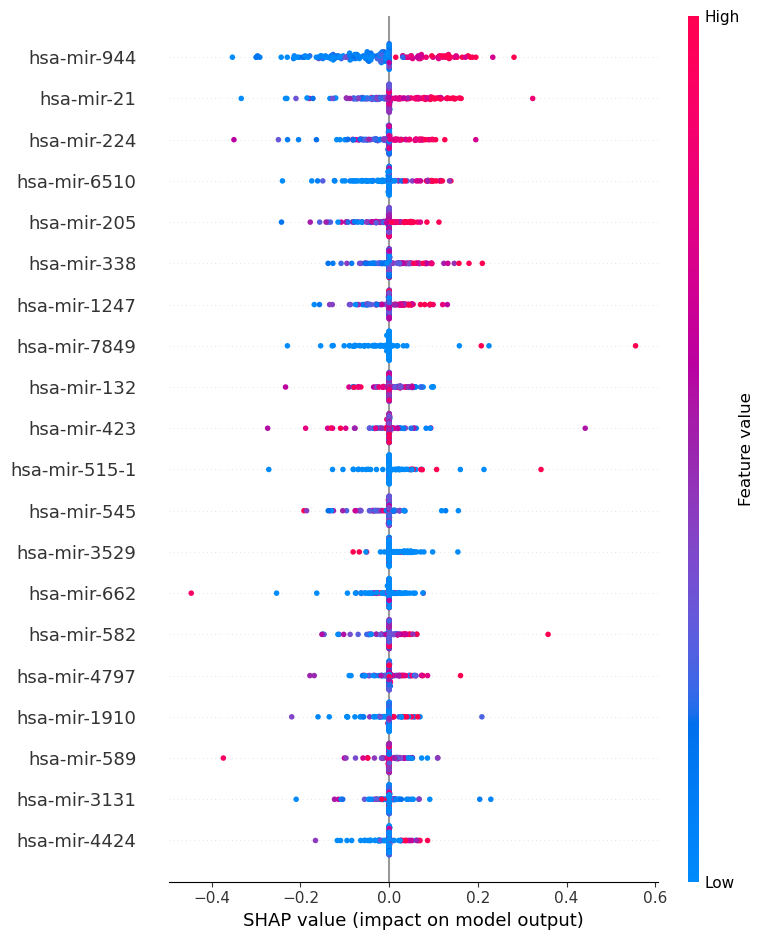

           col_name  feature_importance_vals
130     hsa-mir-944                 0.085274
21       hsa-mir-21                 0.051450
23      hsa-mir-224                 0.030576
107    hsa-mir-6510                 0.027910
20      hsa-mir-205                 0.023013
..              ...                      ...
33   hsa-mir-3156-2                 0.000000
98      hsa-mir-583                 0.000000
128    hsa-mir-8073                 0.000000
5      hsa-mir-1297                 0.000000
104    hsa-mir-6134                 0.000000

[131 rows x 2 columns]
sum shap 1.112721489497192
sum shap 1.0000000000000007
[0.07663539115483228, 0.04623805055487281, 0.02747843811528973, 0.02508234343903987, 0.020681455923531485, 0.020408972500486323, 0.019084925380428504, 0.01674828091746057, 0.015237485903780991, 0.013961985576986202, 0.01377398072806125, 0.013497930893316685, 0.013298100708629664, 0.012961929442624417, 0.01273707343271318, 0.012130015089850047, 0.011140806406530656, 0.01098535473

  0%|          | 0/178 [00:00<?, ?it/s]

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 47 iterations, alpha=2.055e-04, previous alpha=1.624e-04, with an active set of 34 regressors.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.646e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 65 iterations, alpha=9.076e-03, previous alpha=9.037e-03, with an active set of 30 regressors.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=5.015e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 38 iterations, i.e. alpha=5.272e-03

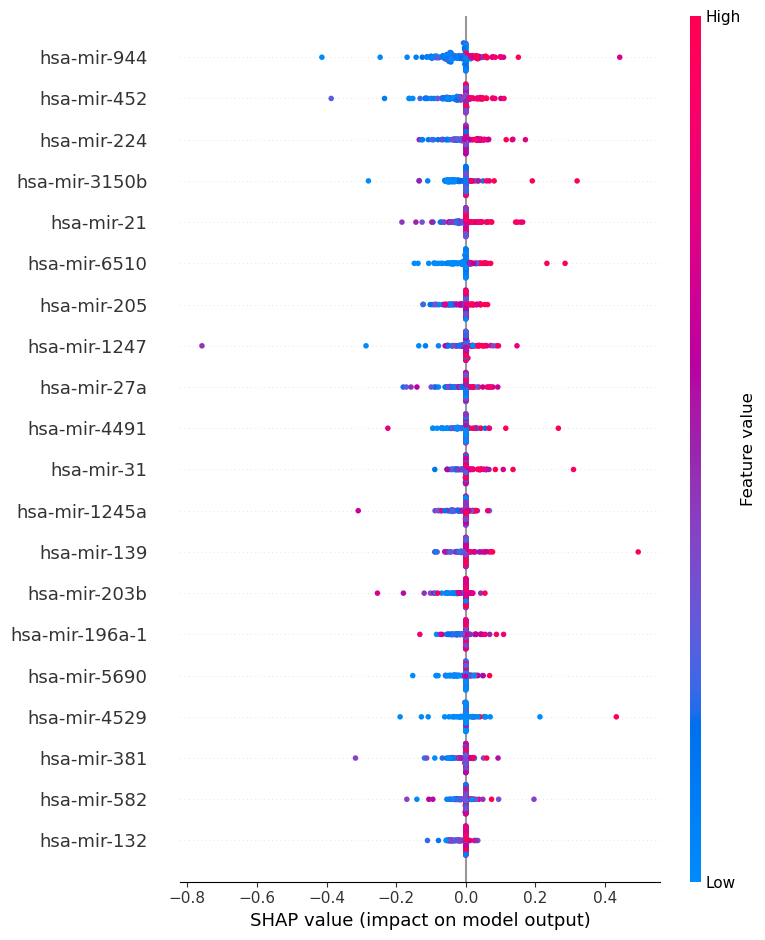

          col_name  feature_importance_vals
130    hsa-mir-944                 0.040134
59     hsa-mir-452                 0.029896
23     hsa-mir-224                 0.020909
30   hsa-mir-3150b                 0.019572
21      hsa-mir-21                 0.018972
..             ...                      ...
12    hsa-mir-1587                 0.000000
93   hsa-mir-5681a                 0.000000
98     hsa-mir-583                 0.000000
101    hsa-mir-591                 0.000000
76    hsa-mir-5011                 0.000000

[131 rows x 2 columns]
sum shap 0.8461074683379818
sum shap 0.9999999999999997
[0.04743390687063712, 0.0353339773656532, 0.024712506267058565, 0.023131667048465813, 0.022422537645385786, 0.02201859691275679, 0.021528875408608514, 0.020565228493920673, 0.019214795521117607, 0.016648038716500498, 0.014977299038638953, 0.014111002800026565, 0.013417127130786822, 0.013217305288918922, 0.013216717886944097, 0.013078341836856229, 0.012554113534292758, 0.012547837339015688,

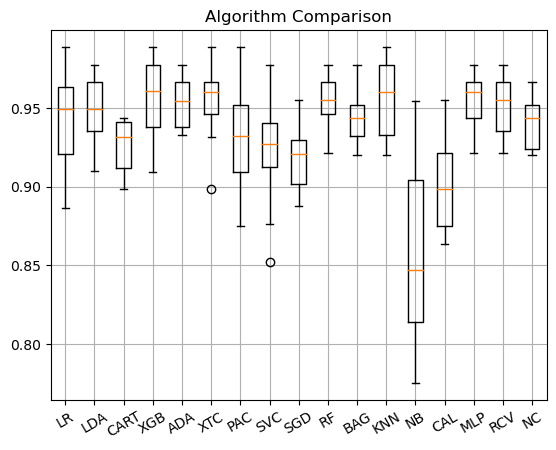

In [72]:
from sklearn import metrics
# evaluate each model in turn, but only with training data set using 10-fold CV
results = []
names = []
classifRep = []
resultsAll = []

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr', random_state = 0)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier(random_state = 0)))
models.append(('XGB', XGBClassifier(random_state = 0)))
models.append(('ADA', AdaBoostClassifier(n_estimators=100, random_state=0)))
models.append(('XTC', ExtraTreesClassifier(random_state = 0)))
models.append(('PAC', PassiveAggressiveClassifier(random_state=0)))
models.append(('SVC', svm.SVC(kernel = 'linear', probability=True, random_state = 0)))
models.append(('SGD', SGDClassifier(max_iter=1000, tol=1e-3, random_state = 0, loss="log_loss")))
models.append(('RF', RandomForestClassifier(random_state = 0)))
models.append(('BAG', BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, random_state=0)))

models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('CAL', CalibratedClassifierCV(GaussianNB(), cv=3)))
models.append(('MLP', MLPClassifier(random_state = 0)))
models.append(('RCV', RidgeClassifierCV()))
models.append(('NC', NearestCentroid()))

from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import shap
from sklearn.preprocessing import MinMaxScaler

allFeatName = {}
overlap = {}

for name, model in models:
    
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    if name == 'KNN':
        cv_results = cross_val_score(model, mirna.values, mirnaLabel.values.ravel(), cv=kfold, scoring='accuracy')
    else:
        cv_results = cross_val_score(model, mirna, mirnaLabel.values.ravel(), cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    resultsAll.append(cv_results.mean())
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
#     if name != 'PAC':
        
#         #plot - comment out for acc
#         ax = plt.gca()
#         y_pred_proba = model.predict_proba(X_test)[::,1]
#         fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#         auc = metrics.roc_auc_score(y_test, y_pred_proba)
#         plt.plot(fpr,tpr,label=name)
#         plt.legend(loc=4)
#         plt.title('ROC Curve Comparison')

    model.fit(X_train, y_train.values.ravel())

    # Choose one of the following methods to summarize the background
    # Option 1: shap.sample
    background_summary = shap.sample(X_train, 25)  # Adjust the number of samples (K)
    # Option 2: shap.kmeans
    # background_summary = shap.kmeans(X_train, 100)  # Adjust the number of samples (K)

    if name == 'XGB':
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
    else:
        explainer = shap.KernelExplainer(model.predict, background_summary)
        shap_values = explainer.shap_values(X_test, nsamples=100)
        
    shap.summary_plot(shap_values,X_test)

    feature_names = X_train.columns

    rf_resultX = pd.DataFrame(shap_values, columns = feature_names)

    vals = np.abs(rf_resultX.values).mean(0)

    shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                      columns=['col_name','feature_importance_vals'])
    shap_importance.sort_values(by=['feature_importance_vals'],
                                   ascending=False, inplace=True)
    print(shap_importance)
    print('sum shap', sum(shap_importance['feature_importance_vals']))
    
    df = shap_importance['feature_importance_vals']
    
    df_scaled = [float(i)/sum(df) for i in df]
    
    shap_importance.drop('feature_importance_vals',  axis=1)
    shap_importance['feature_importance_vals'] = df_scaled
    
    print('sum shap', sum(shap_importance['feature_importance_vals']))

    # Print the scaled data
    print(df_scaled)
    
    for i in shap_importance['col_name']:
        if i not in overlap:
            overlap[i] = shap_importance.loc[shap_importance.col_name == i, 'feature_importance_vals'].values[0]
        else: 
            overlap[i] = overlap[i] + shap_importance.loc[shap_importance.col_name == i, 'feature_importance_vals'].values[0]
    overlapSort = sorted(overlap.items(), key=lambda x:x[1], reverse=True)
    
from matplotlib import pyplot
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.xticks(rotation=30)
pyplot.grid()
pyplot.show()

In [73]:
resultsAll

[0.9424157303370786,
 0.950370275791624,
 0.9255873340143003,
 0.9571629213483146,
 0.954902962206333,
 0.9548901940755874,
 0.9334014300306434,
 0.923276302349336,
 0.9187946884576096,
 0.954864657814096,
 0.9424412665985699,
 0.9548901940755872,
 0.8546348314606742,
 0.9007533197139939,
 0.9560265577119511,
 0.9526302349336058,
 0.940232379979571]

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 131)               17292     
                                                                 
 dense_16 (Dense)            (None, 16)                2112      
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 19,421
Trainable params: 19,421
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
57/57 [==============================] - 2s 12ms/step - loss: 0.4044 - accuracy: 0.8536 - val_loss: 0.2222 - val_accuracy: 0.9296
Epoch 2/80
57/57 [==============================] - 0s 6ms/step - loss: 0.1235 - accuracy: 0.9735 - val_loss: 0.1629 - val_accuracy: 0.9225
Epoch 3/80
57/57 [===============

  0%|          | 0/178 [00:00<?, ?it/s]

79/79 [==============================] - 0s 2ms/step


Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.726e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 62 iterations, alpha=7.057e-03, previous alpha=6.728e-03, with an active set of 27 regressors.


1/1 [==============================] - ETA: 0s

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 95 iterations, alpha=1.741e-04, previous alpha=1.731e-04, with an active set of 42 regressors.
Linear regression equation is singular, Moore-Penrose pseudoinverse is used instead of the regular inverse.
To use regular inverse do one of the following:
1) turn up the number of samples,
2) turn up the L1 regularization with num_features(N) where N is less than the number of samples,
3) group features together to reduce the number of inputs that need to be explained.


79/79 [==============================] - 0s 2ms/step


Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.074e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 62 iterations, alpha=9.242e-03, previous alpha=9.144e-03, with an active set of 27 regressors.


1/1 [==============================] - ETA: 0s

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 136 iterations, alpha=3.084e-04, previous alpha=3.084e-04, with an active set of 41 regressors.


1/1 [==============================] - ETA: 0s

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 112 iterations, alpha=4.046e-04, previous alpha=4.046e-04, with an active set of 33 regressors.


79/79 [==============================] - 0s 2ms/step


Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 49 iterations, alpha=2.486e-04, previous alpha=2.454e-04, with an active set of 28 regressors.


79/79 [==============================] - 0s 2ms/step


Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 145 iterations, alpha=3.596e-05, previous alpha=3.596e-05, with an active set of 48 regressors.


1/1 [==============================] - ETA: 0s

Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.718e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 52 iterations, alpha=1.329e-02, previous alpha=1.237e-02, with an active set of 25 regressors.


79/79 [==============================] - 0s 2ms/step


Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 103 iterations, alpha=1.801e-04, previous alpha=1.257e-04, with an active set of 42 regressors.


79/79 [==============================] - 0s 2ms/step


Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 53 iterations, alpha=2.260e-04, previous alpha=2.000e-04, with an active set of 34 regressors.


79/79 [==============================] - 0s 2ms/step


Regressors in active set degenerate. Dropping a regressor, after 26 iterations, i.e. alpha=5.122e-03, with an active set of 26 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 139 iterations, alpha=7.511e-04, previous alpha=7.511e-04, with an active set of 34 regressors.


79/79 [==============================] - 0s 2ms/step


Regressors in active set degenerate. Dropping a regressor, after 20 iterations, i.e. alpha=3.819e-03, with an active set of 16 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 77 iterations, alpha=6.630e-04, previous alpha=6.630e-04, with an active set of 32 regressors.


79/79 [==============================] - 0s 2ms/step


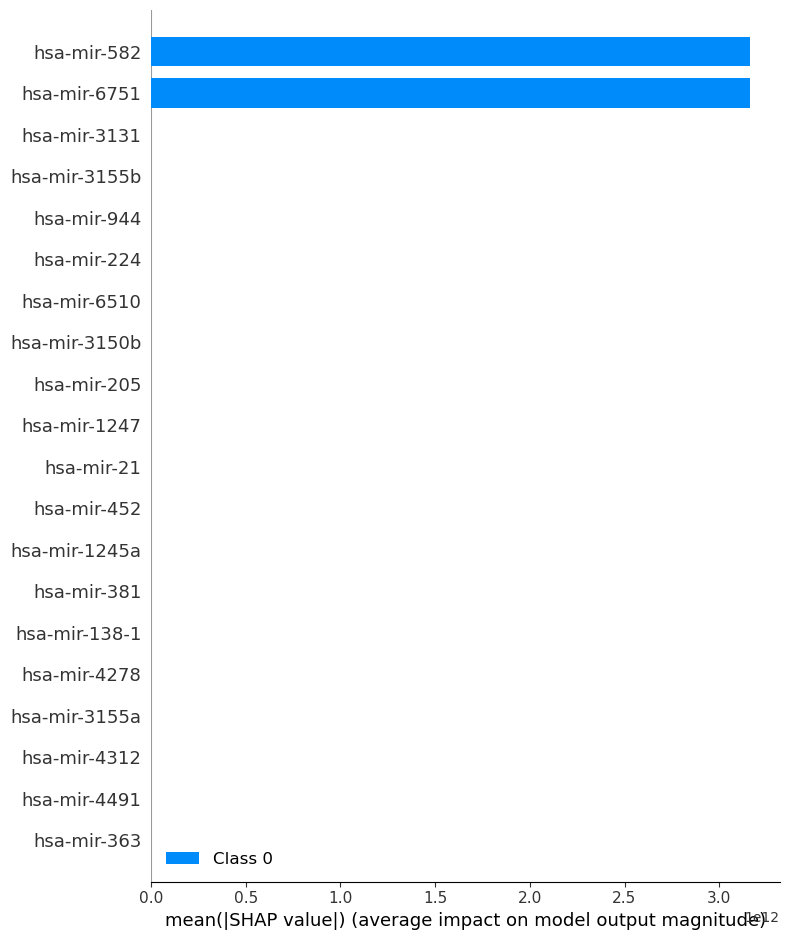

          col_name  feature_importance_vals
103    hsa-mir-601             8.594656e+12
40    hsa-mir-3646             1.150163e-01
76    hsa-mir-5011             2.393592e-02
114   hsa-mir-6778             1.387410e-02
107   hsa-mir-6510             8.597909e-03
..             ...                      ...
35    hsa-mir-3195             3.281508e-03
75    hsa-mir-5010             3.033975e-03
89    hsa-mir-548o             3.017751e-03
62   hsa-mir-4659b             2.925520e-03
39     hsa-mir-363             2.734234e-03

[131 rows x 2 columns]
sum shap 8594655777425.363
sum shap 1.0000000000000009
[0.9999999999999151, 1.3382299918799854e-14, 2.7849769763208662e-15, 1.614270041346228e-15, 1.0003785241652558e-15, 9.241496798408115e-16, 9.214238240582225e-16, 8.755634513723161e-16, 8.290641683934315e-16, 8.198693602509216e-16, 7.581432965733963e-16, 7.430164036140708e-16, 7.340194822955544e-16, 7.300980089972761e-16, 7.281754437345074e-16, 7.257760404726881e-16, 7.227884328561927e-16, 7

In [78]:
    from keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from keras.callbacks import EarlyStopping

    model = Sequential()
    model.add(Dense(131, input_shape=(X_train.shape[1],), activation='relu')) # Add an input shape! (features,)
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    # compile the model
    model.compile(optimizer='Adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    es = EarlyStopping(monitor='val_accuracy',
                                       mode='max',
                                       patience=10,
                                       restore_best_weights=True)
    
    history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=80,
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

    import shap
    # Choose one of the following methods to summarize the background
    # Option 1: shap.sample
    background_summary = shap.sample(X_train, 25)  # Adjust the number of samples (K)
    # Option 2: shap.kmeans
    # background_summary = shap.kmeans(X_train, 100)  # Adjust the number of samples (K)

    explainer = shap.KernelExplainer(model.predict, background_summary)
    shap_values = explainer.shap_values(X_test, nsamples=100)
    
    shap.summary_plot(shap_values,X_test)
    
    annShap = []
    for i in shap_values:
        for j in i:
            annShap.append(np.mean(abs(j)))
    vals = annShap

    feature_names = X_train.columns

    shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                      columns=['col_name','feature_importance_vals'])
    shap_importance.sort_values(by=['feature_importance_vals'],
                                   ascending=False, inplace=True)
    print(shap_importance)
    print('sum shap', sum(shap_importance['feature_importance_vals']))
    
    df = shap_importance['feature_importance_vals']
    
    df_scaled = [float(i)/sum(df) for i in df]
    
    shap_importance.drop('feature_importance_vals',  axis=1)
    shap_importance['feature_importance_vals'] = df_scaled
    
    print('sum shap', sum(shap_importance['feature_importance_vals']))

    # Print the scaled data
    print(df_scaled)
    
    for i in shap_importance['col_name']:
        if i not in overlap:
            overlap[i] = shap_importance.loc[shap_importance.col_name == i, 'feature_importance_vals'].values[0]
        else: 
            overlap[i] = overlap[i] + shap_importance.loc[shap_importance.col_name == i, 'feature_importance_vals'].values[0]
    overlapSort = sorted(overlap.items(), key=lambda x:x[1], reverse=True)

In [79]:
aveFeatVal = pd.DataFrame(overlapSort, columns=['gene', 'val'])
aveFeatVal

,gene,val
0,hsa-mir-944,1.432207
1,hsa-mir-601,1.008074
2,hsa-mir-21,0.762650
3,hsa-mir-6510,0.662631
4,hsa-mir-4521,0.621805
...,...,...
126,hsa-mir-1587,0.006720
127,hsa-mir-3156-2,0.005995
128,hsa-mir-4499,0.005962
129,hsa-mir-6134,0.005897


In [80]:
aveFeatVal['val'] = aveFeatVal['val'] / 18
aveFeatVal

,gene,val
0,hsa-mir-944,0.079567
1,hsa-mir-601,0.056004
2,hsa-mir-21,0.042369
3,hsa-mir-6510,0.036813
4,hsa-mir-4521,0.034545
...,...,...
126,hsa-mir-1587,0.000373
127,hsa-mir-3156-2,0.000333
128,hsa-mir-4499,0.000331
129,hsa-mir-6134,0.000328


In [81]:
round(aveFeatVal['val'], 3)

0      0.080
1      0.056
2      0.042
3      0.037
4      0.035
       ...  
126    0.000
127    0.000
128    0.000
129    0.000
130    0.000
Name: val, Length: 131, dtype: float64

[0]	validation_0-logloss:0.42971	validation_1-logloss:0.44455


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[1]	validation_0-logloss:0.31000	validation_1-logloss:0.33828
[2]	validation_0-logloss:0.23557	validation_1-logloss:0.27279
[3]	validation_0-logloss:0.18174	validation_1-logloss:0.22414
[4]	validation_0-logloss:0.14090	validation_1-logloss:0.19136
[5]	validation_0-logloss:0.11058	validation_1-logloss:0.17247
[6]	validation_0-logloss:0.08834	validation_1-logloss:0.15310
[7]	validation_0-logloss:0.07268	validation_1-logloss:0.14272
[8]	validation_0-logloss:0.06021	validation_1-logloss:0.13527
[9]	validation_0-logloss:0.05019	validation_1-logloss:0.12901
[10]	validation_0-logloss:0.04279	validation_1-logloss:0.12735
[11]	validation_0-logloss:0.03676	validation_1-logloss:0.12467
[12]	validation_0-logloss:0.03220	validation_1-logloss:0.11969
[13]	validation_0-logloss:0.02841	validation_1-logloss:0.11683
[14]	validation_0-logloss:0.02517	validation_1-logloss:0.11908
[15]	validation_0-logloss:0.02278	validation_1-logloss:0.11873
[16]	validation_0-logloss:0.02099	validation_1-logloss:0.11721
[

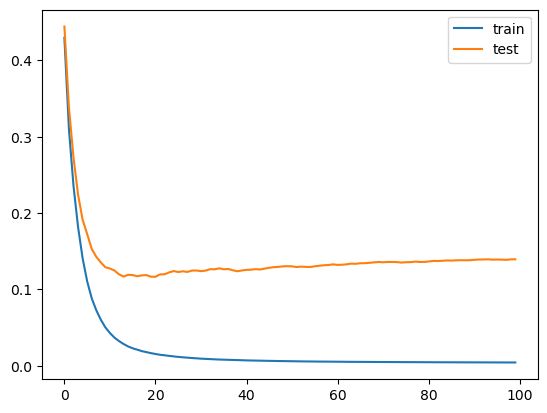

In [82]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()

# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]

# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)

# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

# retrieve performance metrics
results = model.evals_result()

# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# import lime 
# from lime import lime_tabular

# from xgboost import XGBClassifier
# model = XGBClassifier()
# model.fit(X_train, y_train)
# test_1 = X_test.iloc[0]

# lime_explainer = lime_tabular.LimeTabularExplainer(
#     training_data=np.array(X_train),
#     feature_names=X_train.columns,
#     class_names=['CESC', 'UCEC'],
#     mode='classification'
# )
# lime_exp = lime_explainer.explain_instance(
#     data_row=test_1,
#     predict_fn=model.predict_proba
# )
# lime_exp.show_in_notebook(show_table=True)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X, y = mirna, mirnaLabel

naive_bayes = GaussianNB()
svc = SVC(kernel="rbf", gamma=0.001)
xgb = XGBClassifier()

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([naive_bayes, svc, xgb]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:3], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X, y = mirna, mirnaLabel


logit = LogisticRegression(solver='liblinear', multi_class='ovr', random_state = 0)
lda = LinearDiscriminantAnalysis()
dt = DecisionTreeClassifier(random_state = 0)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([logit, lda, dt]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:3], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [ ]:
X, y =  mirna, mirnaLabel


pac = PassiveAggressiveClassifier(random_state=0)
xtree = ExtraTreesClassifier(random_state = 0)
ada = AdaBoostClassifier(n_estimators=100, random_state=0)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([pac, xtree, ada]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:3], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

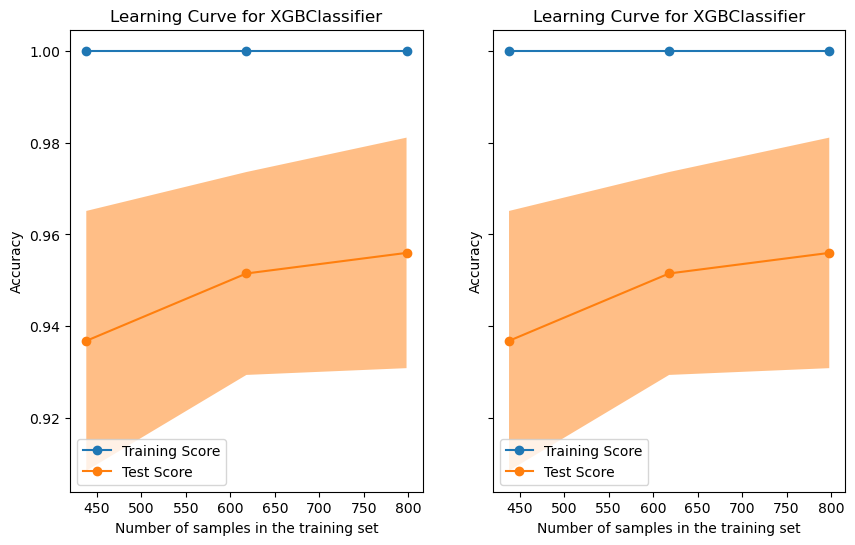

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X, y = mirna, mirnaLabel

naive_bayes = XGBClassifier()
svc = XGBClassifier()

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([naive_bayes, svc]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

[0]	validation_0-auc:0.98704	validation_1-auc:0.96874
[1]	validation_0-auc:0.99657	validation_1-auc:0.98406
[2]	validation_0-auc:0.99651	validation_1-auc:0.98392
[3]	validation_0-auc:0.99897	validation_1-auc:0.98357
[4]	validation_0-auc:0.99963	validation_1-auc:0.98171
[5]	validation_0-auc:0.99989	validation_1-auc:0.98302
[6]	validation_0-auc:0.99999	validation_1-auc:0.98827
[7]	validation_0-auc:1.00000	validation_1-auc:0.98841
[8]	validation_0-auc:1.00000	validation_1-auc:0.99144
[9]	validation_0-auc:1.00000	validation_1-auc:0.99117


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[10]	validation_0-auc:1.00000	validation_1-auc:0.99061
[11]	validation_0-auc:1.00000	validation_1-auc:0.99034
[12]	validation_0-auc:1.00000	validation_1-auc:0.99103
[13]	validation_0-auc:1.00000	validation_1-auc:0.99172
[14]	validation_0-auc:1.00000	validation_1-auc:0.99061
[15]	validation_0-auc:1.00000	validation_1-auc:0.99130
[16]	validation_0-auc:1.00000	validation_1-auc:0.99130
[17]	validation_0-auc:1.00000	validation_1-auc:0.99089
[18]	validation_0-auc:1.00000	validation_1-auc:0.99144
[19]	validation_0-auc:1.00000	validation_1-auc:0.99172
[20]	validation_0-auc:1.00000	validation_1-auc:0.99144
[21]	validation_0-auc:1.00000	validation_1-auc:0.99103
[22]	validation_0-auc:1.00000	validation_1-auc:0.99061
[23]	validation_0-auc:1.00000	validation_1-auc:0.99034
[24]	validation_0-auc:1.00000	validation_1-auc:0.98992
[25]	validation_0-auc:1.00000	validation_1-auc:0.99020
[26]	validation_0-auc:1.00000	validation_1-auc:0.99048
[27]	validation_0-auc:1.00000	validation_1-auc:0.99006
[28]	valid

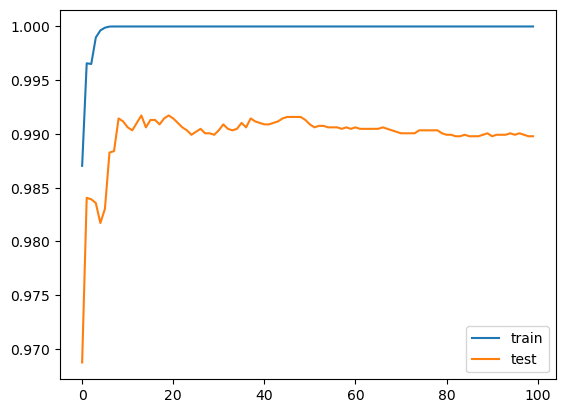

In [90]:
# plot learning curve of an xgboost model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='auc', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['auc'], label='train')
pyplot.plot(results['validation_1']['auc'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()